In [10]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
import pandas as pd 
from sklearn.metrics import mean_squared_error

def readData(dataPath: str):
    df = pd.read_csv(dataPath, delimiter=',', header='infer')
    df = df.dropna()
    return df


def plotDataDistribution(dfWorldHappiness):
    fig, axes = plt.subplots(nrows=2, figsize=(15,15))
    axes[0].hist(dfWorldHappiness["Happiness.Score"])
    axes[0].set_title("Happiness")
    axes[1].hist(dfWorldHappiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    plt.show()

def plotData(dfWorldHappiness):
    fig, axes = plt.subplots()
    axes.plot(dfWorldHappiness["Economy..GDP.per.Capita."], dfWorldHappiness["Happiness.Score"], 'ro')
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between GDP and Happiness')
    plt.show()

def getTrainingAndValidationSets(dfWorldHappiness):
    dataSize = dfWorldHappiness.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index] for index in trainingIndexSet]
    trainingOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [dfWorldHappiness["Economy..GDP.per.Capita."].iloc[index] for index in validationIndexSet]
    validationOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def plotTrainingAndValidationSets(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dfWorldHappiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label='TRAINING DATA')
    #training data = cercuri rosii

    plt.plot(validationInputSet, validationOutputSet, 'g^', label='VALIDATION DATA')
    #validation data = triunghiuri verzi

    axes.set_title("Training and validation data")
    axes.set_xlabel("GDP")
    axes.set_ylabel("HAPPINESS")
    plt.legend()
    plt.show()
    

def getRegressorFromLibrary(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
    X = [[el] for el in trainingInputSet]
    regressor = linear_model.LinearRegression()
    regressor.fit(X, trainingOutputSet)
    return regressor

def plotRegressor(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
    regressor = getRegressorFromLibrary(dfWorldHappiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    numberOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / numberOfPoints
    for i in range(1, numberOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1*el for el in xref]

    fig, axes = plt.subplots()
    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'TRAINING DATA')
    #training data = cercuri rosii

    axes.plot(xref, yref, 'b-', label= 'LEARNED MODEL')
    #linii albastre

    axes.set_title('Training data and learned model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('HAPPINESS')
    axes.legend()
    plt.show()

def getErrors(dfWorldHappiness):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dfWorldHappiness)
    regressor = getRegressorFromLibrary(dfWorldHappiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2)**2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


## PROBLEMA V1

<h2>Distributia datelor</h2>

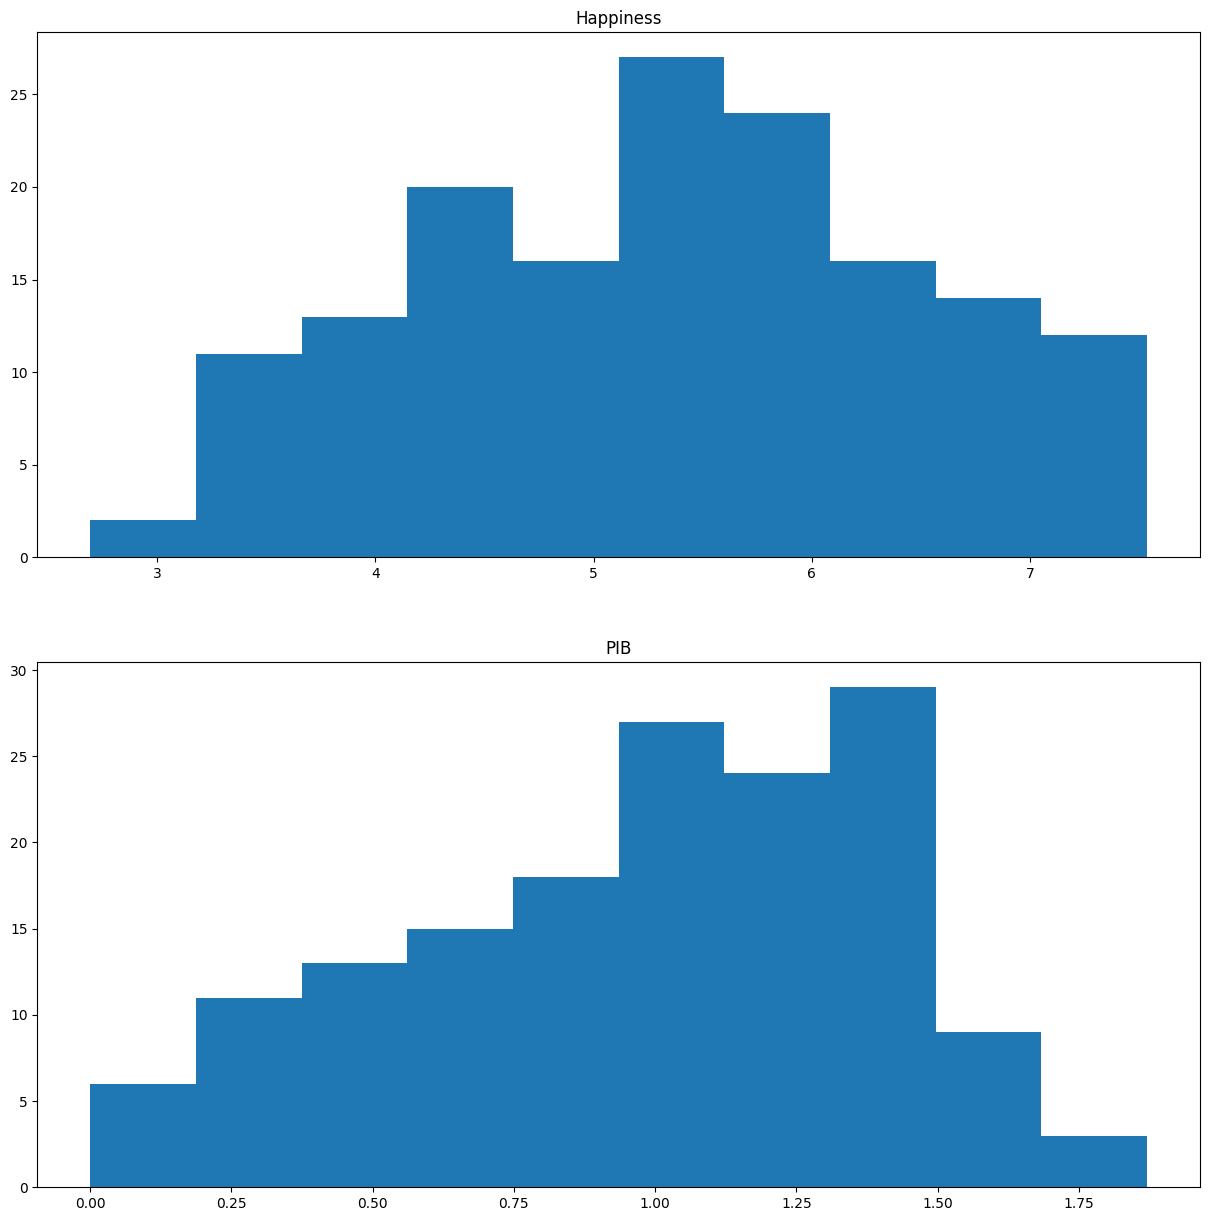

In [11]:
worldHappiness = readData("v1_world-happiness-report-2017.csv");
plotDataDistribution(worldHappiness)

<h2>Plot data</h2>

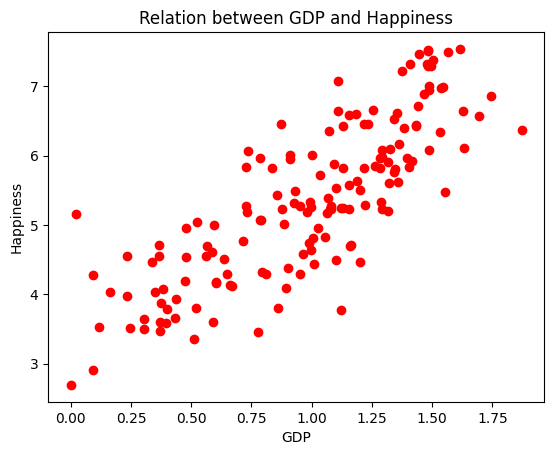

In [12]:
plotData(worldHappiness)

<h2>Impartirea datelor in date de antrenament si de test</h2>

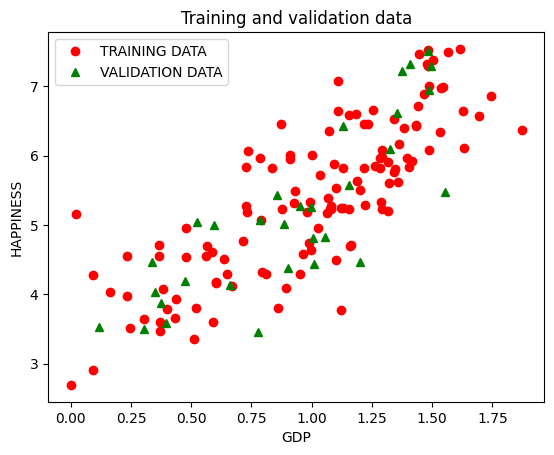

In [13]:
plotTrainingAndValidationSets(worldHappiness)

<h2>Regresor</h2>

LEARNED MODEL: f(x) =  3.241503070235116  +  2.140535626814507  * x
MANUAL ERROR =  0.5385065099755851
COMPUTED ERROR =  0.5385065099755851


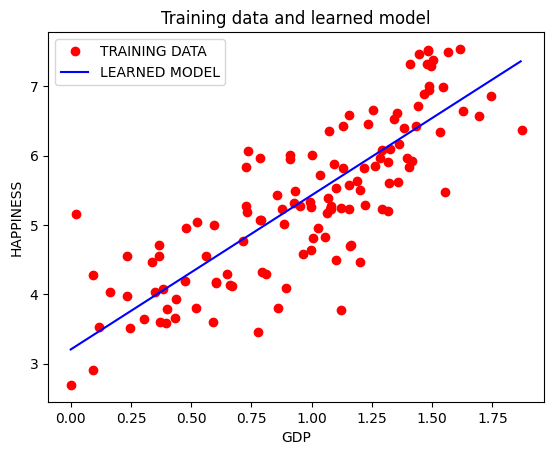

In [14]:
regressor = getRegressorFromLibrary(worldHappiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x")

manualError, computedError = getErrors(worldHappiness)
print("MANUAL ERROR = ", manualError)
print("COMPUTED ERROR = ", computedError)
plotRegressor(worldHappiness)